# LUNA experiment: grid search of regularization and diversification

In this notebook, we performed experiments on LUNA trained with 30 auxiliary functions with a grid search of regularization and diversification, and compared to results to NLM on the 1-D cubic gap dataset.

In [1]:
import time
import sys; sys.path.insert(0, "..")
import os; imagePath = os.path.abspath('..') + '/images/'
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate toy data

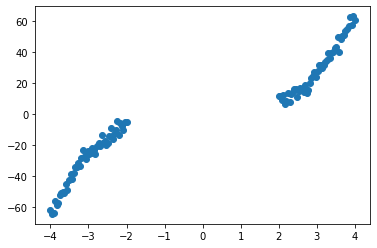

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

## Define function for training NLM and LUNA

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

## Set hyperparameters

In [6]:
n_aux = 30
reg_grid = [0., 10., 30., 100., 300., 1000., 3000.]
div_grid = [0., 10., 100., 1000., 10000.]

step_size = 1e-2
max_iteration_nlm = 5000
max_iteration_luna = 5000

## Fit with NLM and LUNA

In [7]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8609.675694749218; gradient mag: 19684.771982874456
Iteration 100 loss 86.15523146375192; gradient mag: 66.51979782682186
Iteration 200 loss 25.565143200921685; gradient mag: 31.806054041152965
Iteration 300 loss 7.861292192496693; gradient mag: 11.947061701531188
Iteration 400 loss 6.007024786079826; gradient mag: 5.431805624023091
Iteration 500 loss 5.805806035768944; gradient mag: 4.040300680423423
Iteration 600 loss 5.773583086452655; gradient mag: 3.4666898629397984
Iteration 700 loss 5.75918710298556; gradient mag: 2.057247923191438
Iteration 800 loss 5.7489464734602675; gradient mag: 4.676531218132894
Iteration 900 loss 5.7410129176028715; gradient mag: 2.3432962532101698
Iteration 1000 loss 5.734252052692933; gradient mag: 3.2452786175390966
Iteration 1100 loss 5.707847537825712; gradient mag: 3.2035227002370803
Iteration 1200 loss 5.694343308699157; gradient mag: 2.117124821115927
Iteration 1300 loss 5.682293360618988

Iteration 1200 loss 20.602388598217185; gradient mag: 41.75553970968714
Iteration 1300 loss 20.274289761053314; gradient mag: 15.526759453830778
Iteration 1400 loss 20.026991060097437; gradient mag: 51.34316994149081
Iteration 1500 loss 19.705464558143063; gradient mag: 6.52962273184926
Iteration 1600 loss 19.431781452640955; gradient mag: 19.68968741235526
Iteration 1700 loss 19.156575419605055; gradient mag: 29.391878390231856
Iteration 1800 loss 19.02264486178257; gradient mag: 82.3055471427475
Iteration 1900 loss 18.648698570480263; gradient mag: 34.54783037904439
Iteration 2000 loss 18.39987089033098; gradient mag: 36.811506392316616
Iteration 2100 loss 18.143926858259018; gradient mag: 40.462167471025175
Iteration 2200 loss 17.880271569115727; gradient mag: 33.26253225221313
Iteration 2300 loss 17.63244137265687; gradient mag: 32.347067713290826
Iteration 2400 loss 17.375192628130335; gradient mag: 22.585739512713474
Iteration 2500 loss 17.35556706391912; gradient mag: 104.287118

Iteration 2500 loss 48.312122331374226; gradient mag: 14.756893510715699
Iteration 2600 loss 46.18652651927435; gradient mag: 11.489036141434976
Iteration 2700 loss 44.228808897337444; gradient mag: 33.73027610418587
Iteration 2800 loss 42.35041283331431; gradient mag: 13.85041612662808
Iteration 2900 loss 40.557222414034776; gradient mag: 12.326015453912081
Iteration 3000 loss 38.91894731714321; gradient mag: 17.281437574091036
Iteration 3100 loss 37.32997029243432; gradient mag: 5.219989245640281
Iteration 3200 loss 35.87647845040053; gradient mag: 8.113558484569866
Iteration 3300 loss 34.550351474344524; gradient mag: 13.74194678911632
Iteration 3400 loss 33.244260866609636; gradient mag: 4.893114542594367
Iteration 3500 loss 32.038063944824565; gradient mag: 7.042336345443436
Iteration 3600 loss 30.932285941786787; gradient mag: 6.675362783432713
Iteration 3700 loss 29.91782282580042; gradient mag: 10.899718659824448
Iteration 3800 loss 28.953063757080052; gradient mag: 7.038386196

Iteration 3800 loss 105.781274429284; gradient mag: 6.812884057263787
Iteration 3900 loss 105.65244399961739; gradient mag: 5.437301531327984
Iteration 4000 loss 105.53385043119405; gradient mag: 7.5767636180943345
Iteration 4100 loss 105.4189491115702; gradient mag: 12.869570383526144
Iteration 4200 loss 105.29694841862616; gradient mag: 9.104776592310953
Iteration 4300 loss 105.18848466074908; gradient mag: 5.150210154995278
Iteration 4400 loss 105.10902414802841; gradient mag: 8.512302701511906
Iteration 4500 loss 104.9866122561194; gradient mag: 4.9628601356679125
Iteration 4600 loss 104.89392284186728; gradient mag: 10.348142979929257
Iteration 4700 loss 104.77875815256479; gradient mag: 6.815981429785027
Iteration 4800 loss 104.67742554567768; gradient mag: 4.205741025508774
Iteration 4900 loss 104.60196134316551; gradient mag: 10.89970761246549

Training took 0:03:35 (h:mm:ss)


In [17]:
luna_list = []
for div in div_grid:
    for reg in reg_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div, step_size = step_size, max_iteration = max_iteration_luna)
        luna_list.append(luna)
        


===== [ Aux Functions: 30 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 13006.468440645587; gradient mag: 7355.360331768151
Iteration 100 loss 113.73932256179395; gradient mag: 27.613497977640957
Iteration 200 loss 47.9111039659127; gradient mag: 20.684128220273028
Iteration 300 loss 15.851123907573676; gradient mag: 7.185791828388569
Iteration 400 loss 10.541142164090918; gradient mag: 5.621440570966308
Iteration 500 loss 9.089207288599587; gradient mag: 2.895719805062938
Iteration 600 loss 8.259767738778663; gradient mag: 3.189243302637219
Iteration 700 loss 7.683334534404598; gradient mag: 2.9851055018677086
Iteration 800 loss 7.256930642977842; gradient mag: 7.039027568585035
Iteration 900 loss 6.931545803727902; gradient mag: 6.539259597097216
Iteration 1000 loss 6.67980979232939; gradient mag: 4.089187331910683
Iteration 1100 loss 6.4735679336337455; gradient mag: 6.387717457430791
Iteration 1200 loss 6.327406458366345; gradient mag: 5.566250

Iteration 1100 loss 24.047003509185405; gradient mag: 6.480282263917803
Iteration 1200 loss 23.659164312055964; gradient mag: 6.412867853039339
Iteration 1300 loss 23.248676440425847; gradient mag: 2.7239379490029796
Iteration 1400 loss 22.890285447049987; gradient mag: 10.90067615234115
Iteration 1500 loss 22.49568184116598; gradient mag: 6.546272772685185
Iteration 1600 loss 22.126295876024592; gradient mag: 6.39046286774396
Iteration 1700 loss 21.755614311205278; gradient mag: 4.1218391898829125
Iteration 1800 loss 21.400673790757246; gradient mag: 7.781205066799679
Iteration 1900 loss 21.03094056988736; gradient mag: 4.098733639591383
Iteration 2000 loss 20.67480594897885; gradient mag: 1.3896320570798562
Iteration 2100 loss 20.326012348651616; gradient mag: 4.480995669324544
Iteration 2200 loss 19.97946791194439; gradient mag: 2.8309960382135464
Iteration 2300 loss 19.638677192788908; gradient mag: 2.5896856565508677
Iteration 2400 loss 19.30060535176163; gradient mag: 3.618489989

Iteration 2300 loss 55.15056349807928; gradient mag: 2.895165960731779
Iteration 2400 loss 53.05856580427883; gradient mag: 3.193763905598122
Iteration 2500 loss 51.14399145093486; gradient mag: 2.5496721761138432
Iteration 2600 loss 49.390423469797575; gradient mag: 2.545730470887117
Iteration 2700 loss 47.78954554031138; gradient mag: 2.8272943000401827
Iteration 2800 loss 46.32287468767916; gradient mag: 2.360890913705917
Iteration 2900 loss 44.98035705170794; gradient mag: 2.5731081796725968
Iteration 3000 loss 43.75059473928285; gradient mag: 2.377232483589131
Iteration 3100 loss 42.62264502397395; gradient mag: 2.1910242407864655
Iteration 3200 loss 41.59266727605303; gradient mag: 2.573805392943717
Iteration 3300 loss 40.64709504522353; gradient mag: 2.530845859425297
Iteration 3400 loss 39.7841749964569; gradient mag: 3.489259502753814
Iteration 3500 loss 38.982853085628534; gradient mag: 2.645528339093888
Iteration 3600 loss 38.24864633744745; gradient mag: 2.853847668296099
I

Iteration 3500 loss 176.25563463142538; gradient mag: 2.8653051251788515
Iteration 3600 loss 176.2422251102671; gradient mag: 4.419828202842542
Iteration 3700 loss 176.20991433787592; gradient mag: 2.4766341280047537
Iteration 3800 loss 176.20034966999776; gradient mag: 2.4846685042220176
Iteration 3900 loss 176.1912620160679; gradient mag: 2.4307973682474895
Iteration 4000 loss 176.1975239437495; gradient mag: 4.939982215749856
Iteration 4100 loss 176.18551794119452; gradient mag: 3.7209769174170333
Iteration 4200 loss 176.1868446842702; gradient mag: 4.485060451214749
Iteration 4300 loss 176.1905099416709; gradient mag: 4.693888415377953
Iteration 4400 loss 176.17572358887517; gradient mag: 4.275911608760119
Iteration 4500 loss 176.1681325470816; gradient mag: 3.9920223005111204
Iteration 4600 loss 176.17494007348193; gradient mag: 3.504540981165856
Iteration 4700 loss 176.17091154476992; gradient mag: 2.474869215605047
Iteration 4800 loss 176.17549466570128; gradient mag: 3.45310934

Iteration 4600 loss 19.605070372705704; gradient mag: 8.605427205832743
Iteration 4700 loss 19.429028661748813; gradient mag: 10.176310280804556
Iteration 4800 loss 19.3546030987589; gradient mag: 4.302205270274922
Iteration 4900 loss 19.405640611015755; gradient mag: 10.229610664215215

Training took 0:07:22 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 30.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 13045.720994903886; gradient mag: 7356.755247818108
Iteration 100 loss 148.108406102259; gradient mag: 37.25059319306564
Iteration 200 loss 80.90235026762065; gradient mag: 18.344179722812875
Iteration 300 loss 46.576549992252225; gradient mag: 11.976216941562152
Iteration 400 loss 40.38787614447464; gradient mag: 5.01760105357864
Iteration 500 loss 37.48822388767144; gradient mag: 34.239716363301966
Iteration 600 loss 36.58254196093742; gradient mag: 3.183044040142826
Iteration 700 loss 36.04266289888768; gradient mag: 3.4277390191970443
Iteration 800 loss 35.

Iteration 600 loss 154.57313956628974; gradient mag: 6.521367686897717
Iteration 700 loss 144.49548999912167; gradient mag: 6.819420308870404
Iteration 800 loss 135.40714674481657; gradient mag: 5.770732843330821
Iteration 900 loss 127.17769416213007; gradient mag: 5.403936153171469
Iteration 1000 loss 119.72785536096283; gradient mag: 8.30667194329537
Iteration 1100 loss 113.03301527593068; gradient mag: 5.139928909162645
Iteration 1200 loss 106.80036602464237; gradient mag: 6.584039980163574
Iteration 1300 loss 101.20513739500669; gradient mag: 5.545754926522703
Iteration 1400 loss 96.17023647626036; gradient mag: 5.455594056423875
Iteration 1500 loss 91.32108455639484; gradient mag: 5.0858771460827406
Iteration 1600 loss 87.11861619806976; gradient mag: 4.698182072867525
Iteration 1700 loss 83.03186246216534; gradient mag: 5.6386659342682846
Iteration 1800 loss 79.39549758538328; gradient mag: 5.402142554163964
Iteration 1900 loss 76.00724837037552; gradient mag: 3.6914960630160727


Iteration 1800 loss 197.42576507773714; gradient mag: 6.639976846403168
Iteration 1900 loss 194.94023546137694; gradient mag: 5.407132454670322
Iteration 2000 loss 192.9905505903696; gradient mag: 6.1756943742266435
Iteration 2100 loss 191.43832470415404; gradient mag: 5.540670014224454
Iteration 2200 loss 190.21280924987042; gradient mag: 4.970141009457334
Iteration 2300 loss 189.24687128214757; gradient mag: 3.901421826823109
Iteration 2400 loss 188.480417173597; gradient mag: 4.252962555384761
Iteration 2500 loss 187.89461315767932; gradient mag: 4.716381634907052
Iteration 2600 loss 187.4648387912386; gradient mag: 3.566721785132113
Iteration 2700 loss 187.15678824489294; gradient mag: 5.554650912538848
Iteration 2800 loss 186.89777120355686; gradient mag: 3.747547161067269
Iteration 2900 loss 186.72323390419788; gradient mag: 4.0869876174597914
Iteration 3000 loss 186.5820223576147; gradient mag: 4.2042299757771575
Iteration 3100 loss 186.46958194375603; gradient mag: 3.9922669917

Iteration 2900 loss 127.06884945231894; gradient mag: 72.63769049795822
Iteration 3000 loss 125.91476855795028; gradient mag: 74.45903948101355
Iteration 3100 loss 124.34132254419865; gradient mag: 18.424983470405294
Iteration 3200 loss 124.45583794220524; gradient mag: 48.82838558931592
Iteration 3300 loss 124.64028358883184; gradient mag: 74.6332212356351
Iteration 3400 loss 124.69179574371191; gradient mag: 51.89222168187448
Iteration 3500 loss 124.24529723811638; gradient mag: 32.55448071879983
Iteration 3600 loss 124.89135721182562; gradient mag: 62.45461877285624
Iteration 3700 loss 124.09552645265398; gradient mag: 55.600617086491454
Iteration 3800 loss 123.91093807283872; gradient mag: 30.291927550298567
Iteration 3900 loss 123.48343982894015; gradient mag: 29.267328722835398
Iteration 4000 loss 123.36119760311803; gradient mag: 23.752725190901327
Iteration 4100 loss 123.29316530794708; gradient mag: 34.203187516839066
Iteration 4200 loss 123.49284841015094; gradient mag: 38.29

Iteration 4000 loss 152.27520960040357; gradient mag: 5.405576770955658
Iteration 4100 loss 152.19182664569314; gradient mag: 44.41629913267785
Iteration 4200 loss 151.3920591084227; gradient mag: 13.648681291902909
Iteration 4300 loss 150.91440713072865; gradient mag: 9.764424729655213
Iteration 4400 loss 150.76923907886925; gradient mag: 51.90091743998384
Iteration 4500 loss 150.18024651319308; gradient mag: 24.812601120700915
Iteration 4600 loss 149.81008971519574; gradient mag: 40.959736617275084
Iteration 4700 loss 149.30476942280114; gradient mag: 11.716270115266289
Iteration 4800 loss 148.9734442511131; gradient mag: 8.001362457870021
Iteration 4900 loss 148.62021767931367; gradient mag: 2.630160142395889

Training took 0:08:00 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 300.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 13398.857971897412; gradient mag: 7374.923424784823
Iteration 100 loss 411.4428076305914; gradient mag: 270.88469876453485
Iteratio

Iteration 100 loss 1834.9489532871153; gradient mag: 84.94313555411233
Iteration 200 loss 1245.8171510643624; gradient mag: 80.29421433823464
Iteration 300 loss 942.2059055807752; gradient mag: 69.20231254195771
Iteration 400 loss 753.6714816486374; gradient mag: 40.99195877570824
Iteration 500 loss 628.1605247406161; gradient mag: 40.998569151741734
Iteration 600 loss 542.3070615511585; gradient mag: 29.85947213584117
Iteration 700 loss 482.0763097965739; gradient mag: 27.72662680572597
Iteration 800 loss 439.13596882824174; gradient mag: 20.99813690771608
Iteration 900 loss 407.7691199045705; gradient mag: 17.689851731216795
Iteration 1000 loss 384.73581838222566; gradient mag: 16.453265032953254
Iteration 1100 loss 367.69447406238214; gradient mag: 14.994791366035082
Iteration 1200 loss 354.69875678205597; gradient mag: 12.619989965306777
Iteration 1300 loss 345.01542908096434; gradient mag: 12.638032059026186
Iteration 1400 loss 337.7065115013693; gradient mag: 16.934962338479533
I

Iteration 1300 loss 668.9601681538032; gradient mag: 281.61435339940914
Iteration 1400 loss 671.6935312528873; gradient mag: 706.9215271715419
Iteration 1500 loss 669.7650203427108; gradient mag: 436.65681294017634
Iteration 1600 loss 669.0969830015524; gradient mag: 327.5317756669563
Iteration 1700 loss 668.996669604107; gradient mag: 358.646288331576
Iteration 1800 loss 669.2076157710007; gradient mag: 366.42723855797664
Iteration 1900 loss 669.0199665038758; gradient mag: 340.5436604815437
Iteration 2000 loss 668.8157556316792; gradient mag: 302.3128722724491
Iteration 2100 loss 668.6269369177404; gradient mag: 322.90813544058733
Iteration 2200 loss 669.5933691935494; gradient mag: 528.5301395050528
Iteration 2300 loss 669.245741498343; gradient mag: 494.6310146879775
Iteration 2400 loss 668.5255516118589; gradient mag: 278.0006019322365
Iteration 2500 loss 668.5603699786067; gradient mag: 344.418254146569
Iteration 2600 loss 668.4358174626569; gradient mag: 326.3528344940984
Iterat

Iteration 2500 loss 664.5757043796755; gradient mag: 81.13920593385467
Iteration 2600 loss 663.2973842003856; gradient mag: 52.82767508460951
Iteration 2700 loss 663.4679562993354; gradient mag: 357.8910008598034
Iteration 2800 loss 661.8163239093312; gradient mag: 260.5484963097562
Iteration 2900 loss 660.8791571665831; gradient mag: 281.0137610949346
Iteration 3000 loss 660.0221407632723; gradient mag: 318.274707352285
Iteration 3100 loss 660.6532394340361; gradient mag: 286.0961927674041
Iteration 3200 loss 659.6233842970323; gradient mag: 396.0285810591721
Iteration 3300 loss 657.4494101878411; gradient mag: 343.14310782343716
Iteration 3400 loss 655.8452173474491; gradient mag: 155.88273313986468
Iteration 3500 loss 655.6915695760725; gradient mag: 261.3381303873864
Iteration 3600 loss 654.7604738497466; gradient mag: 148.69026430497124
Iteration 3700 loss 654.587961554706; gradient mag: 535.8492086450195
Iteration 3800 loss 653.8002376382876; gradient mag: 358.4813279668273
Itera

Iteration 3700 loss 721.2813140039625; gradient mag: 306.01888774707163
Iteration 3800 loss 720.8166797595558; gradient mag: 260.0929713986079
Iteration 3900 loss 719.0373976542819; gradient mag: 27.02677219763213
Iteration 4000 loss 718.6904928400479; gradient mag: 120.317778836385
Iteration 4100 loss 718.2242229606906; gradient mag: 18.988846409521024
Iteration 4200 loss 718.3267368549205; gradient mag: 50.24511218841336
Iteration 4300 loss 718.9481334495792; gradient mag: 239.21300606564031
Iteration 4400 loss 718.4477098266746; gradient mag: 292.71403040742484
Iteration 4500 loss 718.5613692324139; gradient mag: 219.6644981004975
Iteration 4600 loss 716.9623811237097; gradient mag: 23.515547228349917
Iteration 4700 loss 717.0440256196121; gradient mag: 160.67807806804953
Iteration 4800 loss 717.0328292432125; gradient mag: 94.93280492815464
Iteration 4900 loss 717.1386939627548; gradient mag: 280.6631088051773

Training took 0:07:38 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regu

Iteration 4900 loss 5024.48198682784; gradient mag: 1906.1553665674803

Training took 0:10:09 (h:mm:ss)

===== [ Aux Functions: 30 ] === [ Regularization: 10.0 ] === [ Diversification: 10000.0 ] =====

Iteration 0 loss 22286.74633999761; gradient mag: 11751.16260085229
Iteration 100 loss 5308.848855335398; gradient mag: 3527.4796277895157
Iteration 200 loss 5089.461521040352; gradient mag: 1541.5129724187095
Iteration 300 loss 5062.836717934844; gradient mag: 3599.0881077744707
Iteration 400 loss 5077.427592648025; gradient mag: 5521.340314072814
Iteration 500 loss 5051.213522619575; gradient mag: 3816.153438132601
Iteration 600 loss 5040.130241511933; gradient mag: 2510.160624383821
Iteration 700 loss 7496.281079445601; gradient mag: 7347.696893184216
Iteration 800 loss 5569.469963664749; gradient mag: 7339.940237711498
Iteration 900 loss 5297.6012291256; gradient mag: 2193.061550616927
Iteration 1000 loss 5115.410353071598; gradient mag: 2419.3896121959556
Iteration 1100 loss 5117.25

Iteration 900 loss 5152.971562719172; gradient mag: 5839.198849361041
Iteration 1000 loss 5073.767407730761; gradient mag: 897.9365167001259
Iteration 1100 loss 5089.851114606768; gradient mag: 5014.769363157446
Iteration 1200 loss 5076.546938659801; gradient mag: 2952.8153754920495
Iteration 1300 loss 5218.9728207761; gradient mag: 10857.249872850998
Iteration 1400 loss 5064.819444549856; gradient mag: 190.94571540671728
Iteration 1500 loss 5065.920278185126; gradient mag: 2027.2399347284127
Iteration 1600 loss 5192.013347256646; gradient mag: 5436.17399217105
Iteration 1700 loss 5060.900113565591; gradient mag: 1552.5739312544247
Iteration 1800 loss 5079.217550785486; gradient mag: 4446.670159091722
Iteration 1900 loss 5059.756520869603; gradient mag: 2178.7772676489817
Iteration 2000 loss 5056.999609230017; gradient mag: 1862.0456363415838
Iteration 2100 loss 5068.371752559568; gradient mag: 4379.633027815423
Iteration 2200 loss 5052.859994790761; gradient mag: 510.6012850267204
Ite

Iteration 2100 loss 5331.6442267229195; gradient mag: 3893.4451530823635
Iteration 2200 loss 5316.039110788908; gradient mag: 1632.2154800637645
Iteration 2300 loss 5305.5941791864825; gradient mag: 2285.2409244261235
Iteration 2400 loss 5294.938544813622; gradient mag: 1408.3877103480884
Iteration 2500 loss 5292.326912821905; gradient mag: 3168.403447412416
Iteration 2600 loss 5278.960108293299; gradient mag: 1577.392524528002
Iteration 2700 loss 5287.316186543035; gradient mag: 4199.103201802388
Iteration 2800 loss 5268.035928444463; gradient mag: 2342.692398917349
Iteration 2900 loss 5258.932472453874; gradient mag: 2335.2856579778895
Iteration 3000 loss 5253.37972176616; gradient mag: 2046.3466595521968
Iteration 3100 loss 5247.921461632446; gradient mag: 2482.6037777734496
Iteration 3200 loss 5245.779335461537; gradient mag: 3447.3219141678615
Iteration 3300 loss 5234.689115114606; gradient mag: 1253.7285237283945
Iteration 3400 loss 5232.109420208499; gradient mag: 2703.250652417

## Plot auxiliary functions after fitting

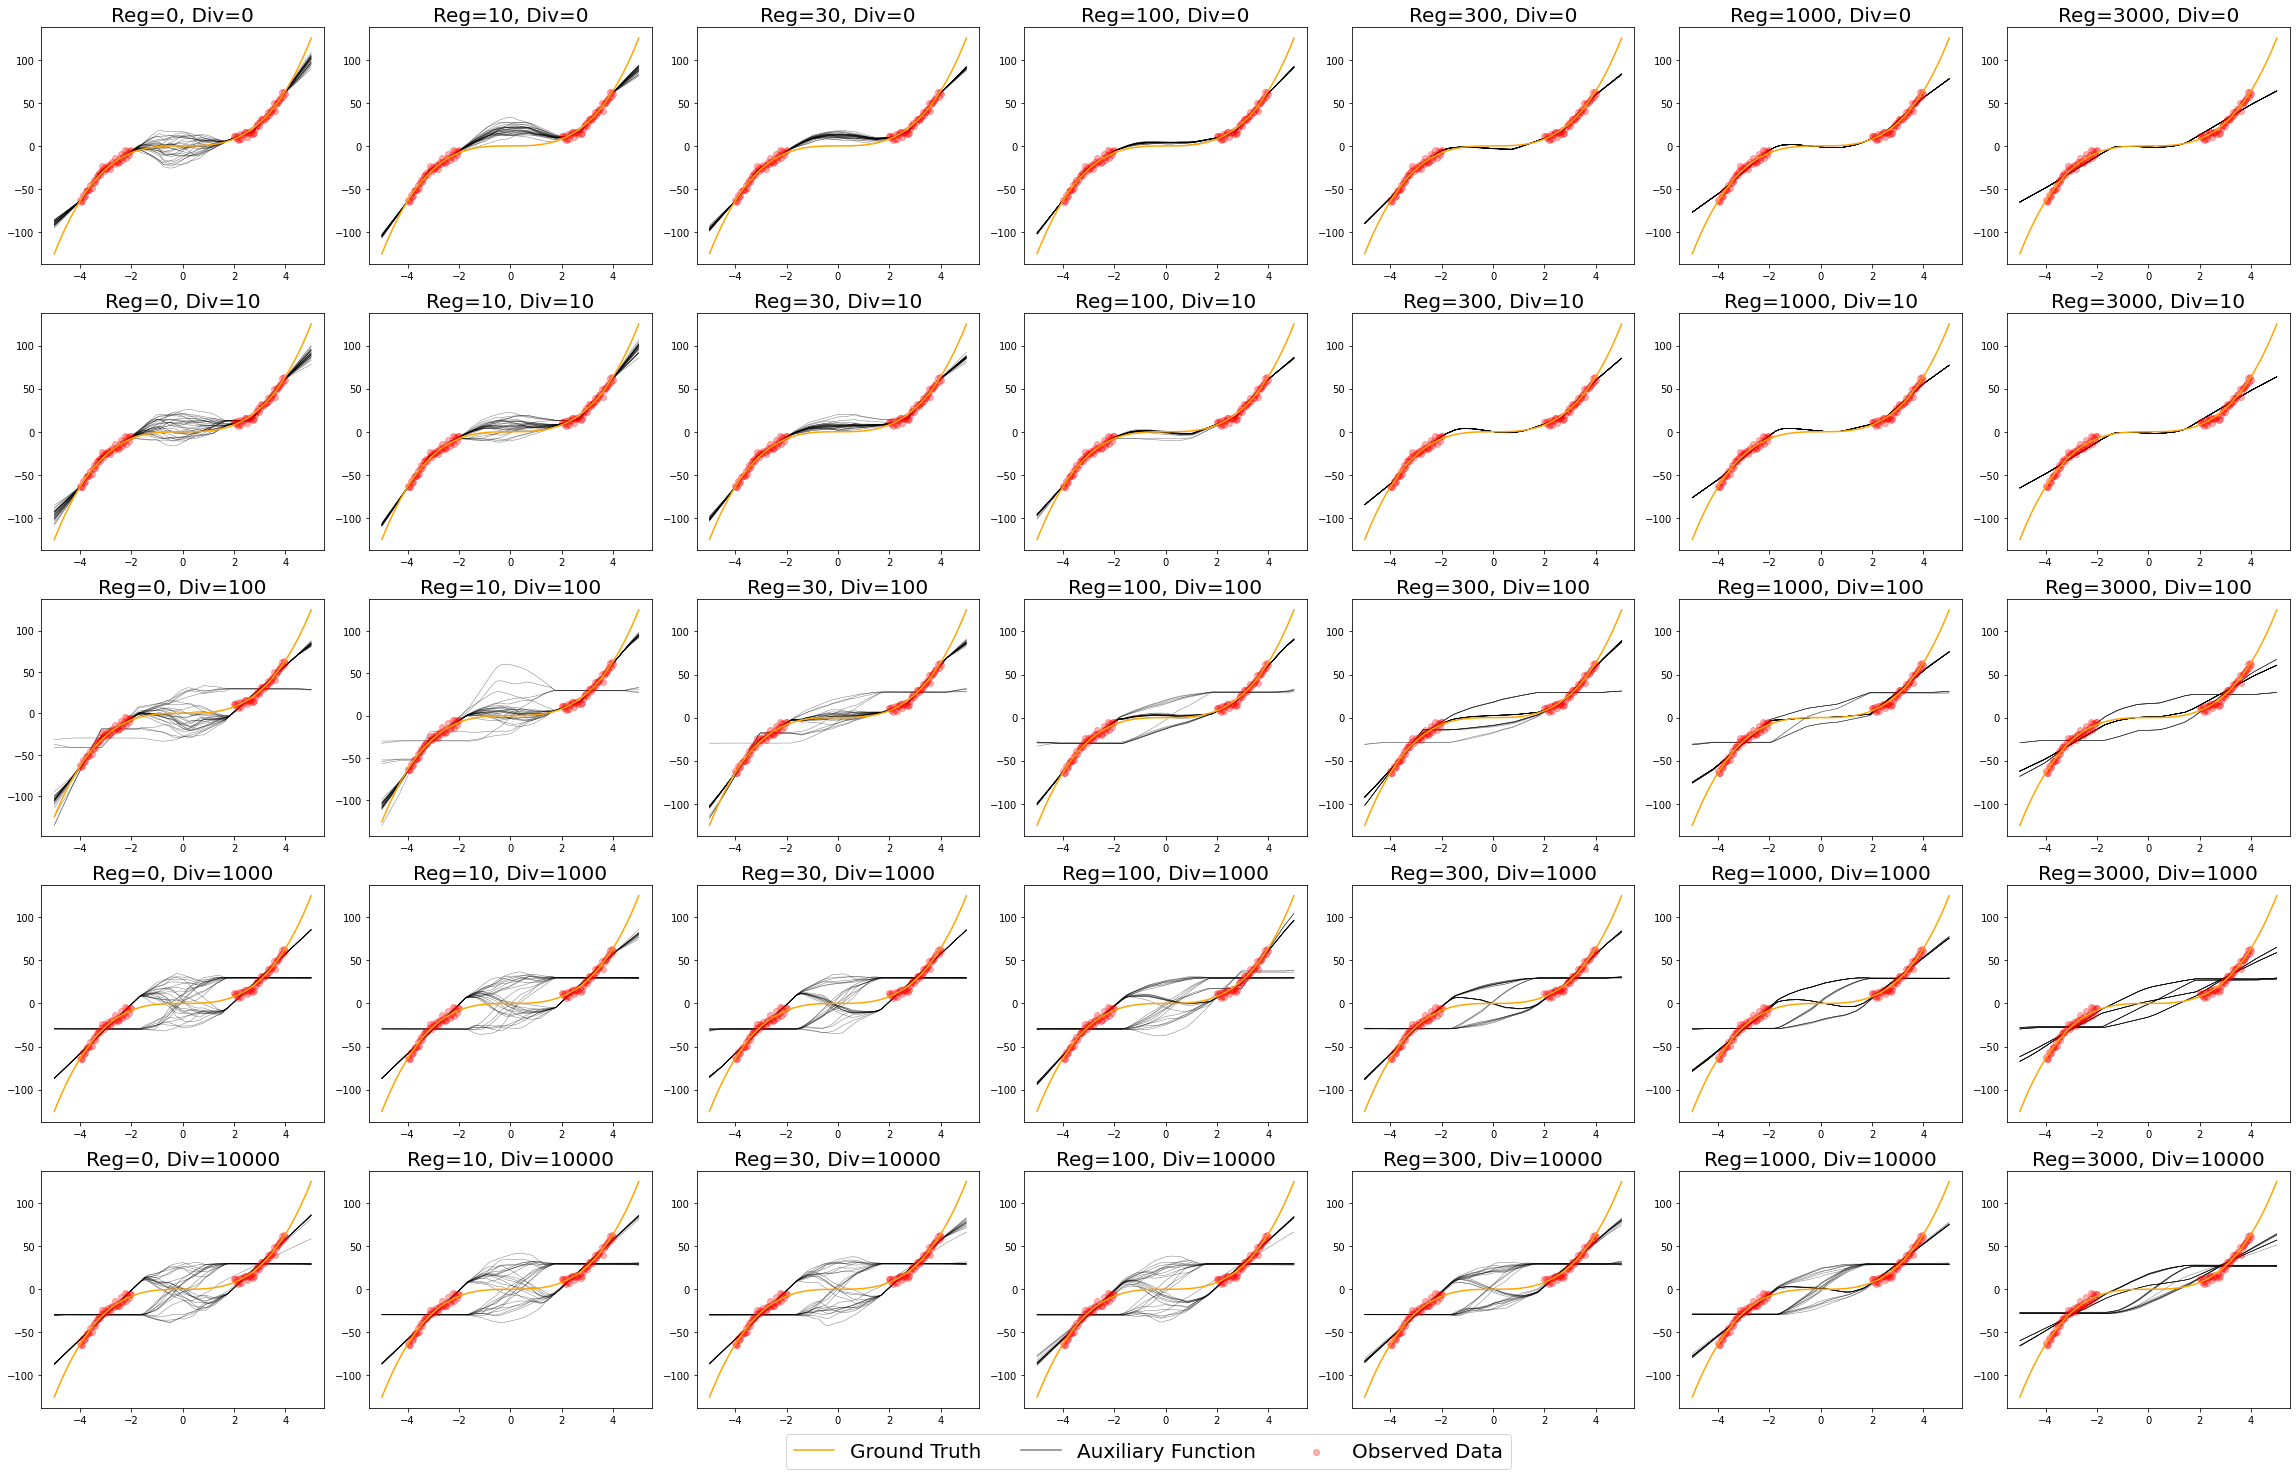

In [116]:
fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
    ax.plot(np.NaN, np.NaN, color='black', alpha=0.5, label="Auxiliary Function")
    ax.set_title(f"Reg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize = 20)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3,fontsize = 20,bbox_to_anchor=(0.25, -0.03, 0.5, 0.5))
plt.tight_layout()
# plt.savefig(imagePath+'aux_funcs_30_aux_5000_steps-2.png',dpi = 150, bbox_inches='tight')
plt.show()

## Plot prior samples

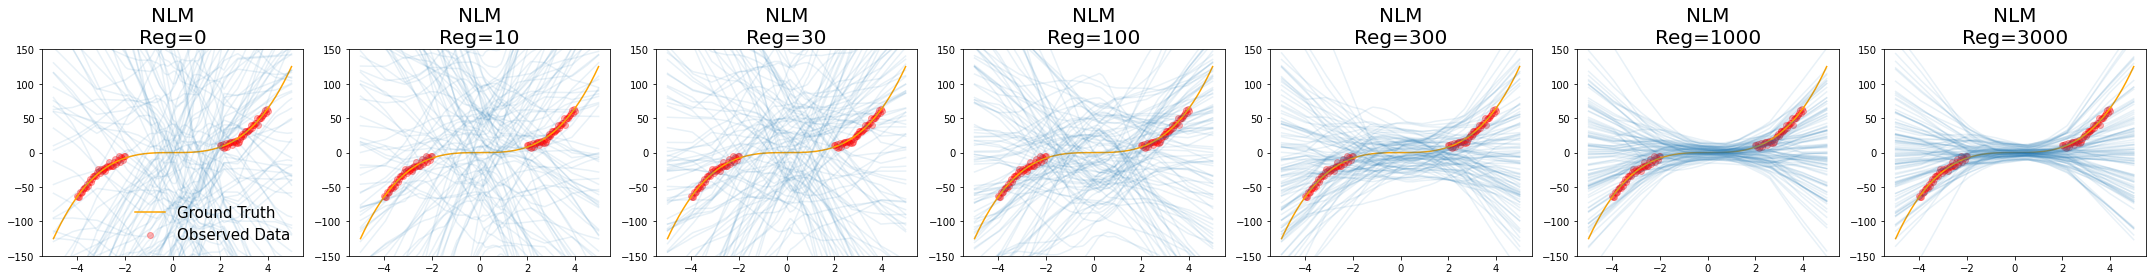

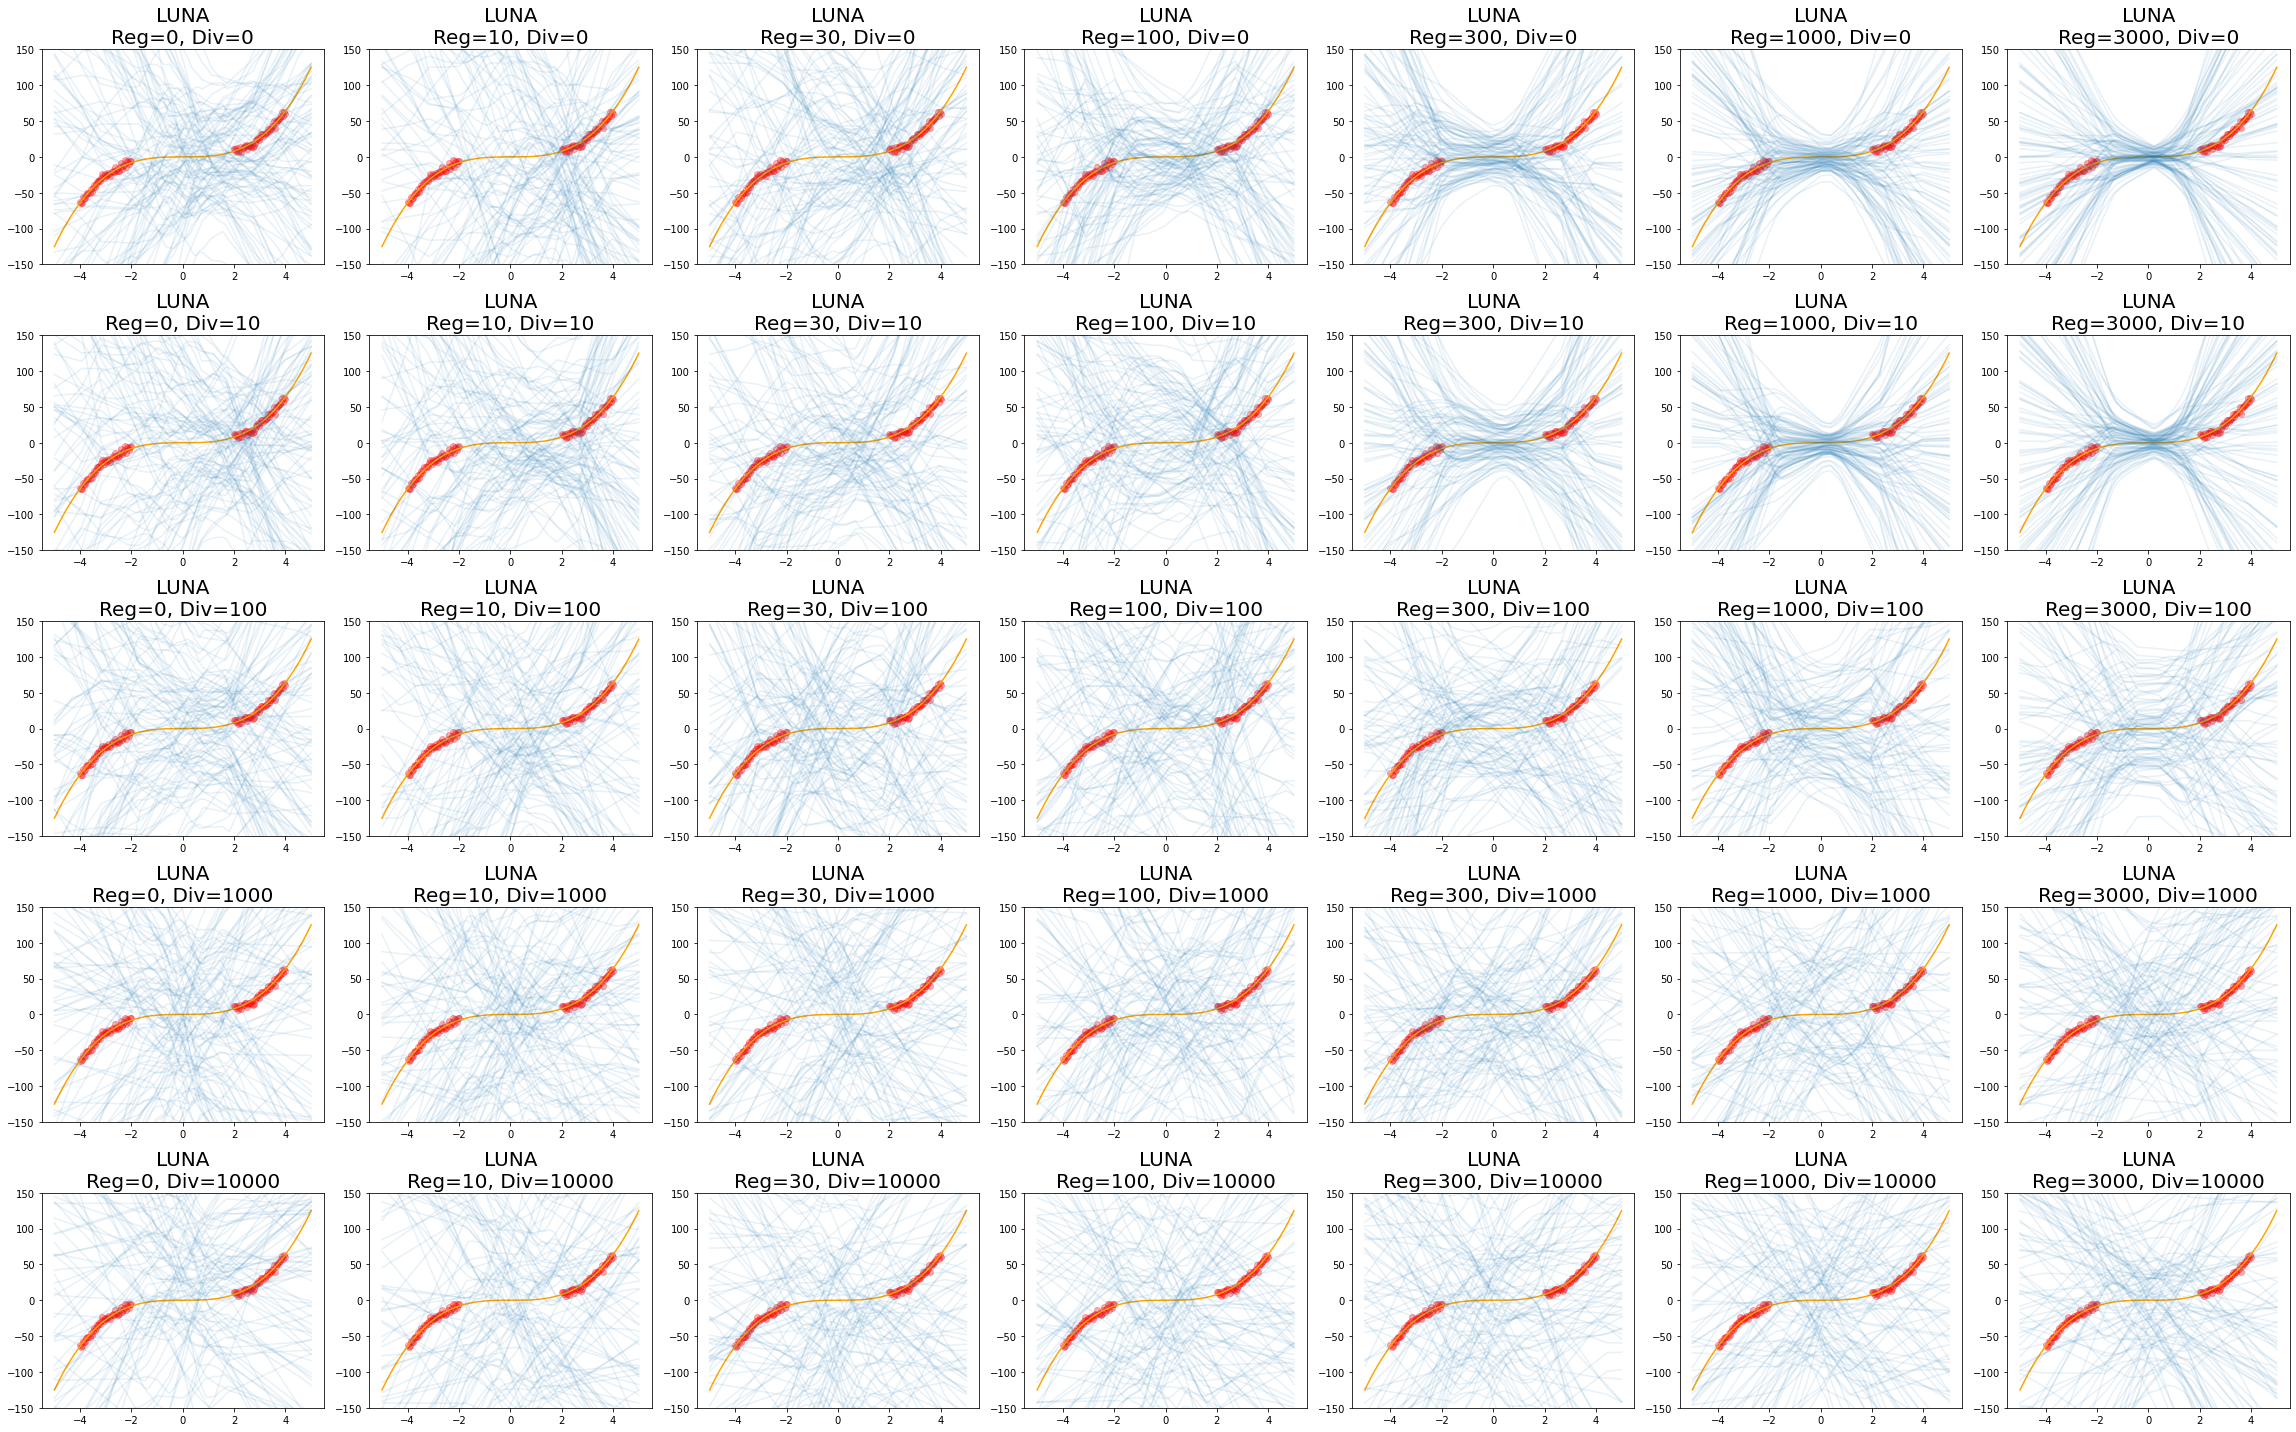

In [30]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize = 20)
    ax.set_ylim([-150, 150])
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
# plt.savefig(imagePath+'prior_samples_NLM_30_aux_5000_steps-2.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
# plt.savefig(imagePath+'prior_samples_LUNA_30_aux_5000_steps-2.png',dpi = 150)
plt.show()

## Plot posterior samples

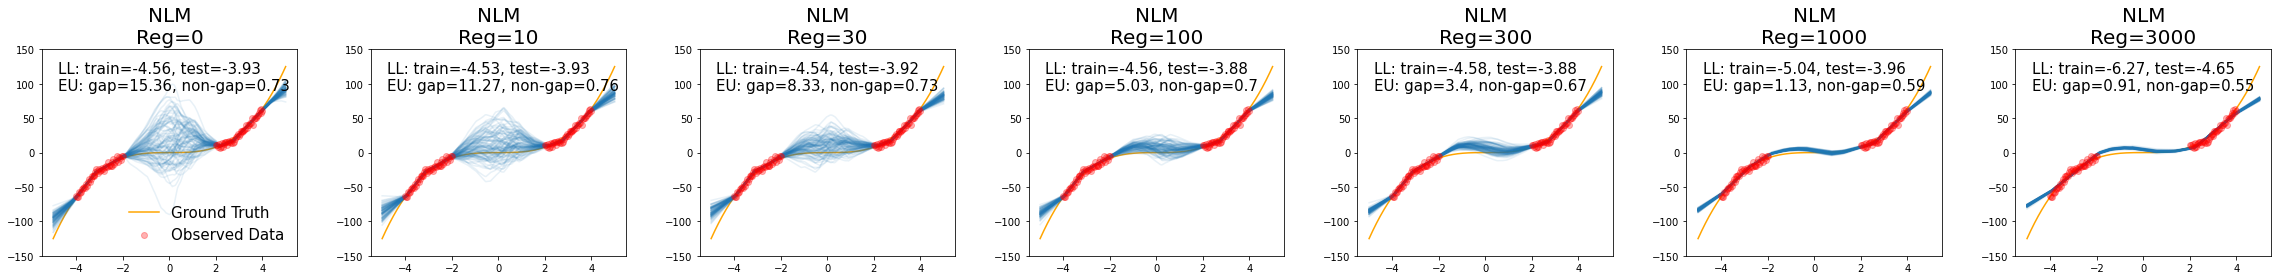

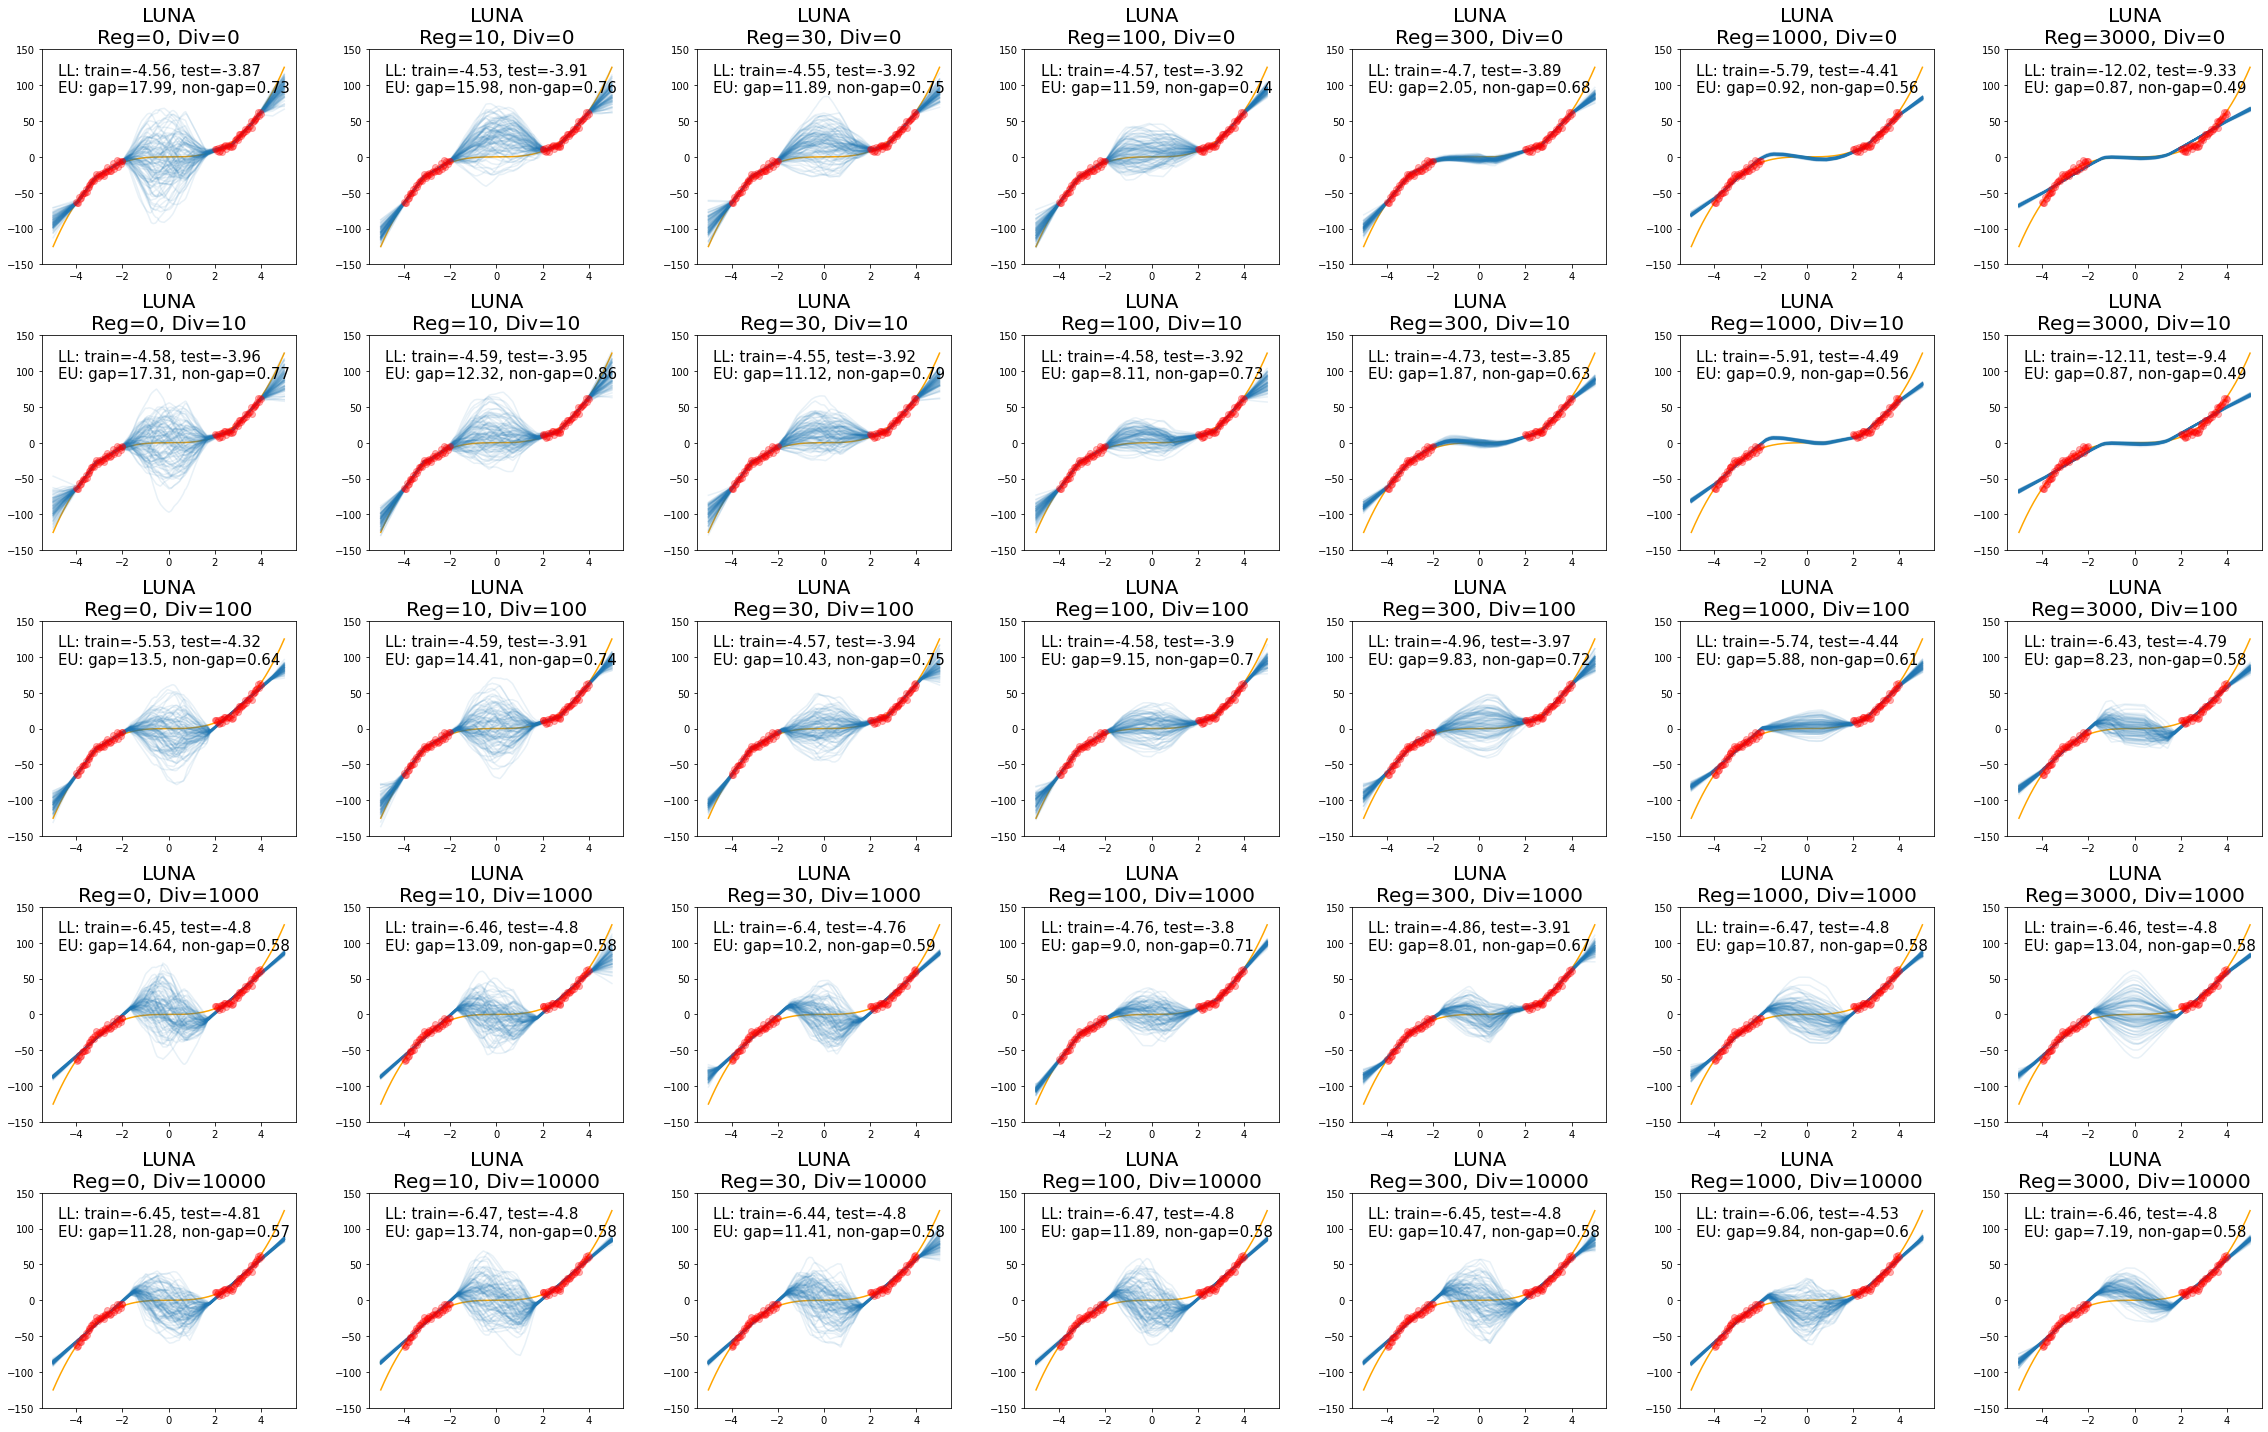

In [74]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(1, len(reg_grid), figsize=(32, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\nEU: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}", fontsize=15)    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
# plt.savefig(imagePath+'post_samples_NLM_30_aux_5000_steps-2.png',dpi = 150)
plt.show()


nll_train_list_luna = []
nll_test_list_luna = []
eps_gap_list_luna = []
eps_non_gap_list_luna = []

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = luna.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = luna.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_luna.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_luna.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\nEU: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
# plt.savefig(imagePath+'post_samples_LUNA_30_aux_5000_steps-2.png',dpi = 150)
plt.show()

## Plot posterior predictive intervals

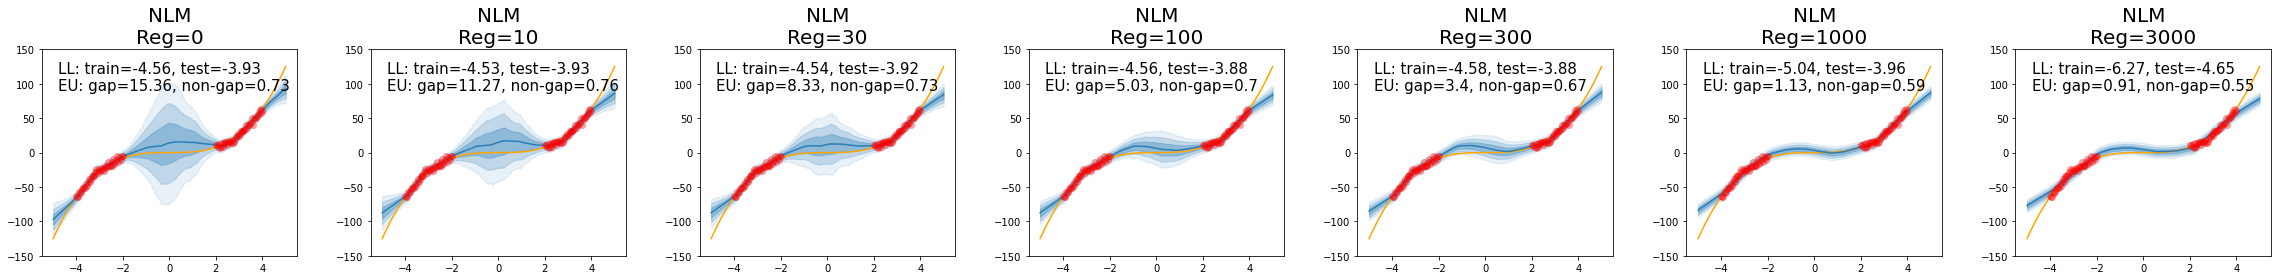

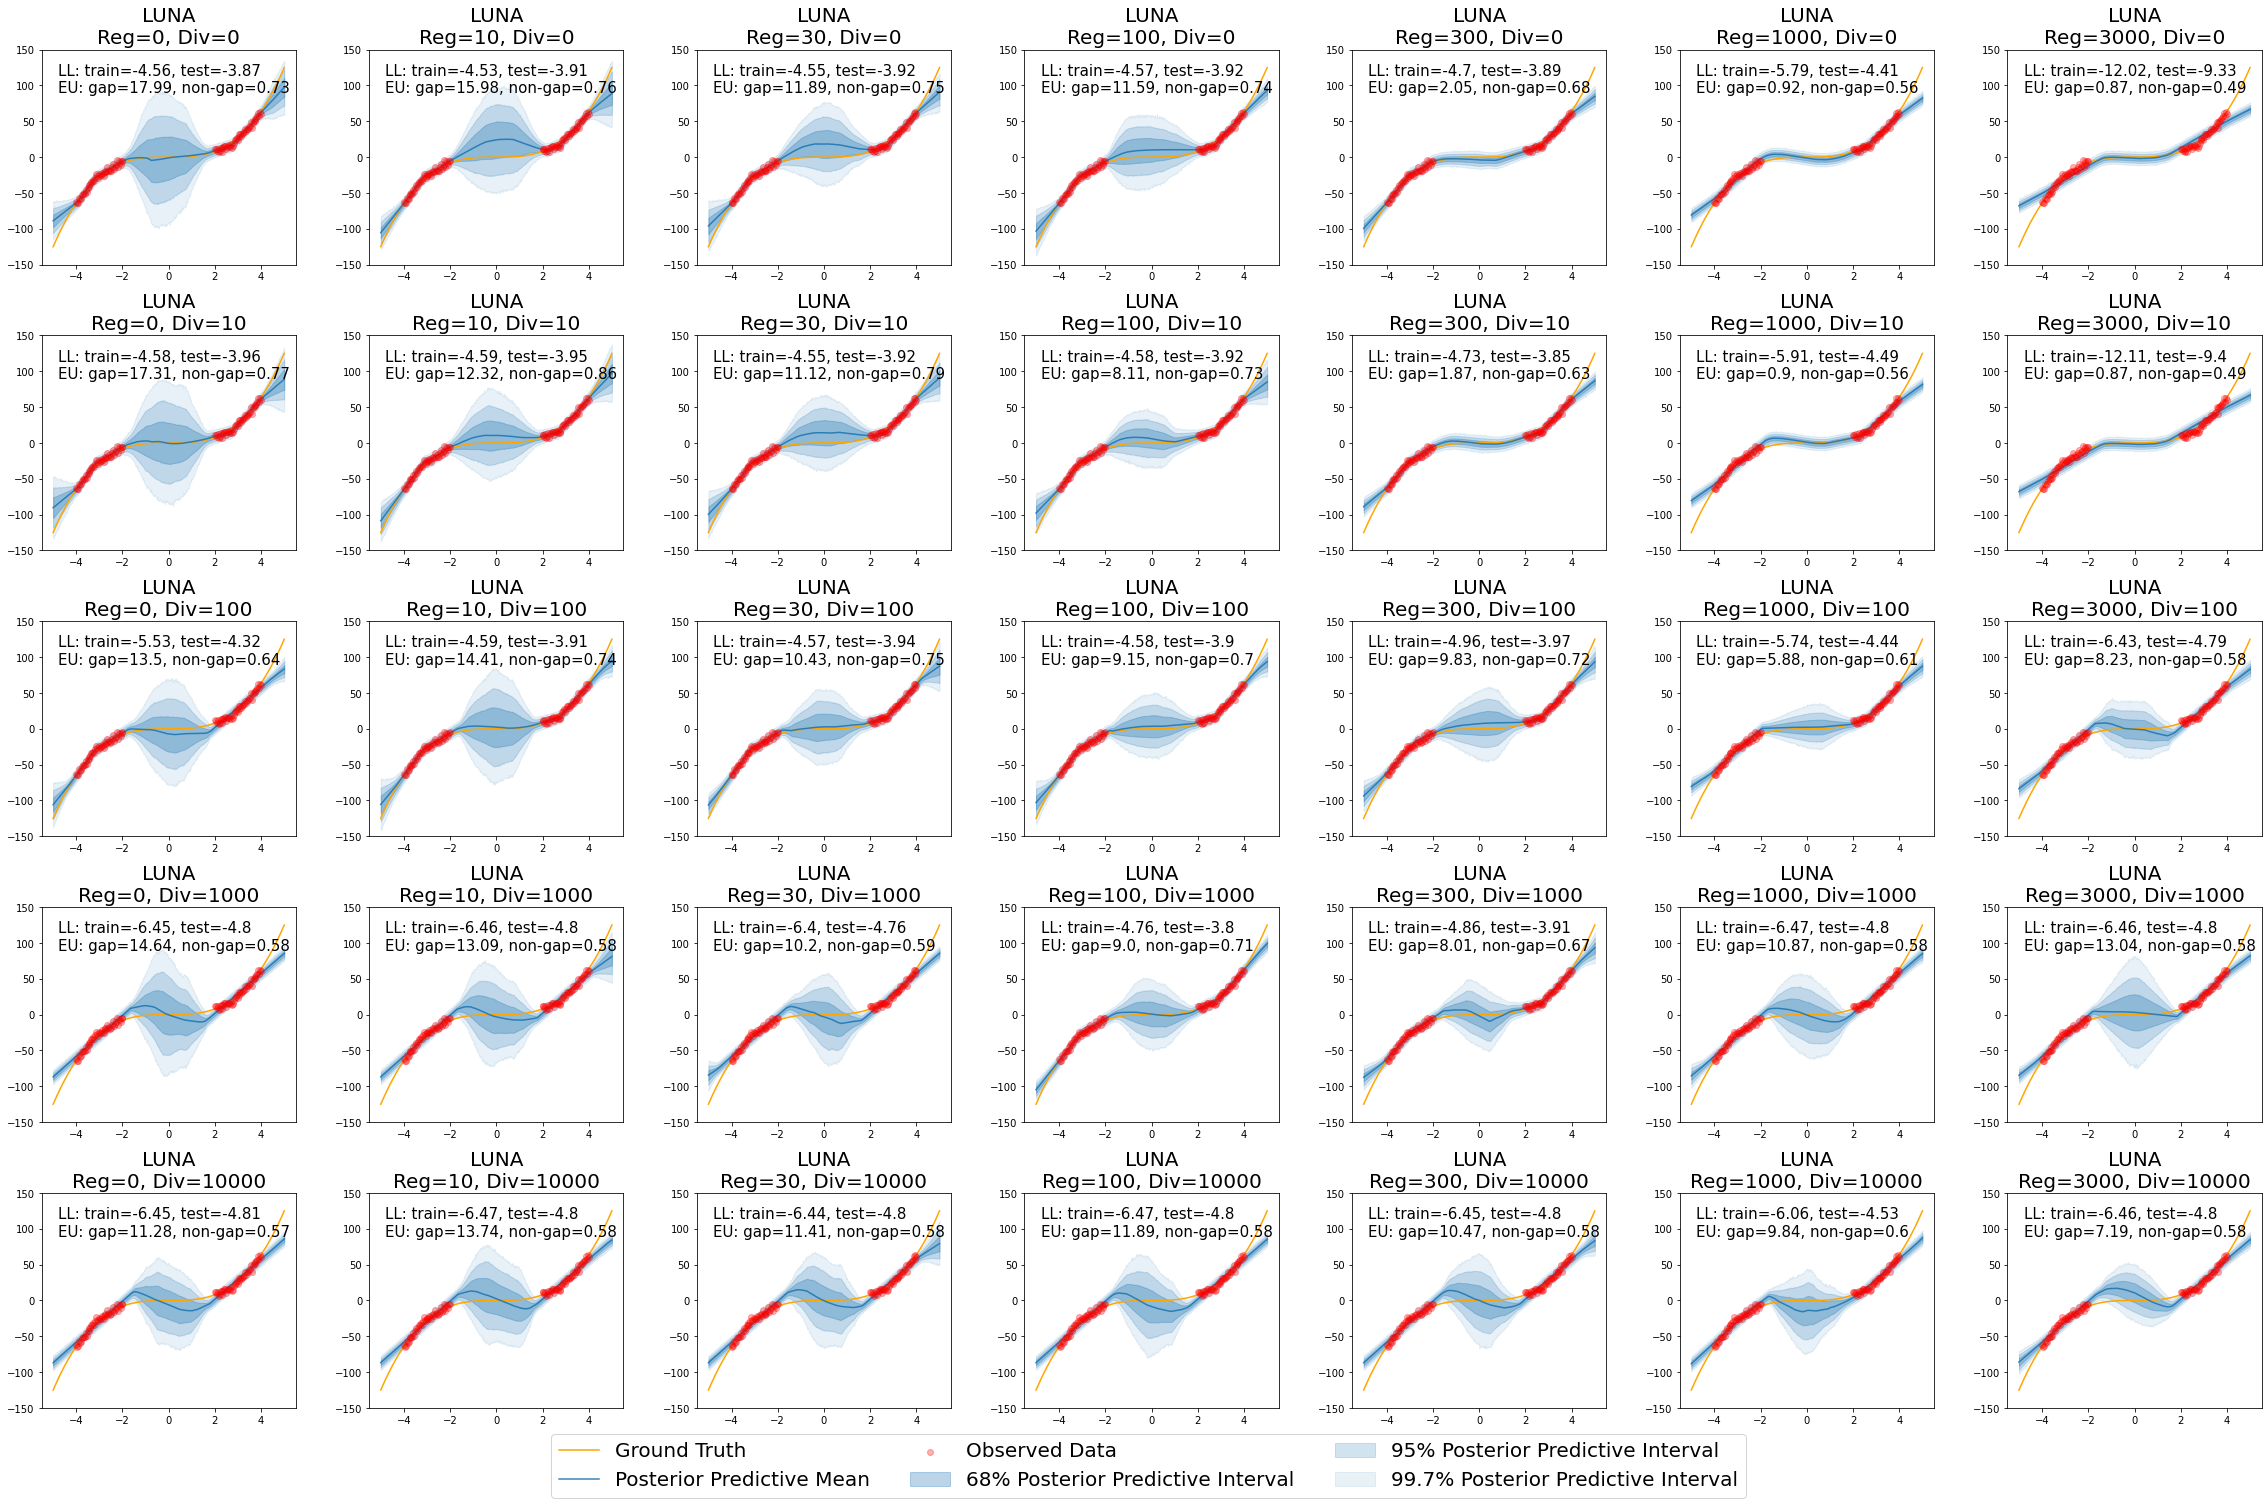

In [81]:
fig, axes = plt.subplots(1, len(reg_grid), figsize=(32, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Post Pred Mean')
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label='68% Posterior Predictive Interval')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label='95% Posterior Predictive Interval')
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label='99.7% Posterior Predictive Interval')

    ax.set_ylim([-150, 150])
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\nEU: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
# plt.savefig(imagePath+'PPI_NLM_30_aux_5000_steps-2.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label='68% Posterior Predictive Interval')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label='95% Posterior Predictive Interval')
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label='99.7% Posterior Predictive Interval')

    ax.set_ylim([-150, 150])  
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\nEU: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3,fontsize = 20,bbox_to_anchor=(0.25, -0.05, 0.5, 0.5))
plt.tight_layout()
# plt.savefig(imagePath+'PPI_LUNA_30_aux_5000_steps-2.png',dpi = 150, bbox_inches='tight')
plt.show()


## Evaluate model performance (log likelihood) and epistemic uncertainty

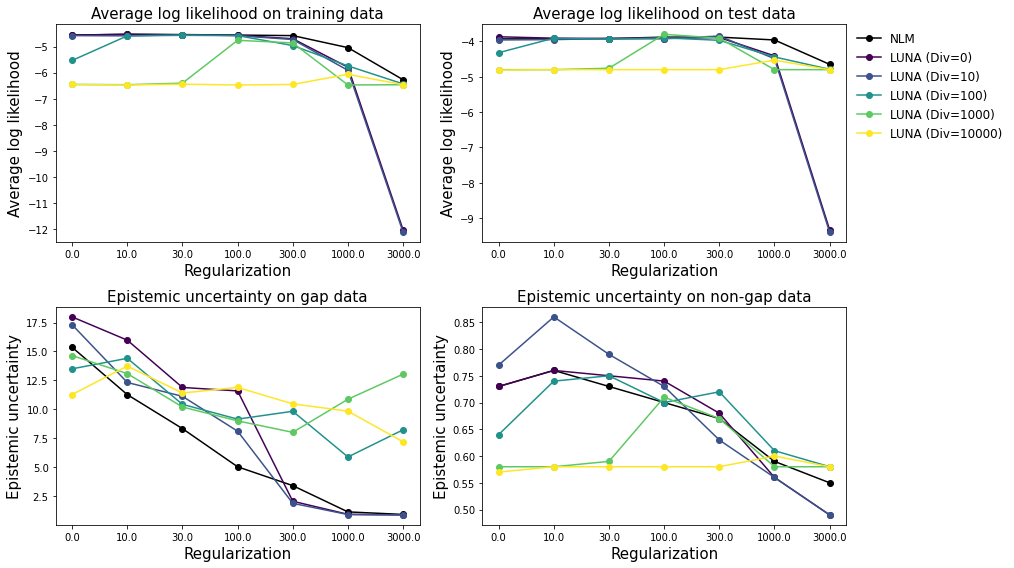

In [114]:
cmap = plt.get_cmap('viridis', len(div_grid))
fontsize = 15
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes[0,0].plot(-np.array(nll_train_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,0].plot(-np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (Div={int(div)})")
axes[0,0].set_xticks(range(len(reg_grid)))
axes[0,0].set_xticklabels(np.array(reg_grid))
axes[0,0].set_xlabel('Regularization',fontsize = fontsize)
axes[0,0].set_ylabel('Average log likelihood',fontsize = fontsize)
axes[0,0].set_title('Average log likelihood on training data',fontsize = fontsize)

axes[0,1].plot(-np.array(nll_test_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,1].plot(-np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (Div={div})")
axes[0,1].set_xticks(range(len(reg_grid)))
axes[0,1].set_xticklabels(np.array(reg_grid))
axes[0,1].set_xlabel('Regularization',fontsize = fontsize)
axes[0,1].set_ylabel('Average log likelihood',fontsize = fontsize)
axes[0,1].set_title('Average log likelihood on test data',fontsize = fontsize)

axes[1,0].plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,0].plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (Div={div})")
axes[1,0].set_xticks(range(len(reg_grid)))
axes[1,0].set_xticklabels(np.array(reg_grid))
axes[1,0].set_xlabel('Regularization',fontsize = fontsize)
axes[1,0].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
axes[1,0].set_title('Epistemic uncertainty on gap data',fontsize = fontsize)

axes[1,1].plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,1].plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (Div={div})")
axes[1,1].set_xticks(range(len(reg_grid)))
axes[1,1].set_xticklabels(np.array(reg_grid))
axes[1,1].set_xlabel('Regularization',fontsize = fontsize)
axes[1,1].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
axes[1,1].set_title('Epistemic uncertainty on non-gap data',fontsize = fontsize)

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=1,fontsize = 12,bbox_to_anchor=(0.83, 0.73, 0.5, 0.5),frameon=False)
plt.tight_layout()
# plt.savefig(imagePath+'evaluation_30_aux_5000_steps-2.png',dpi = 150, bbox_inches='tight')
plt.show()

### Show direct comparison of selected NLM and LUNA

Reg = 300.0 Div = 100.0


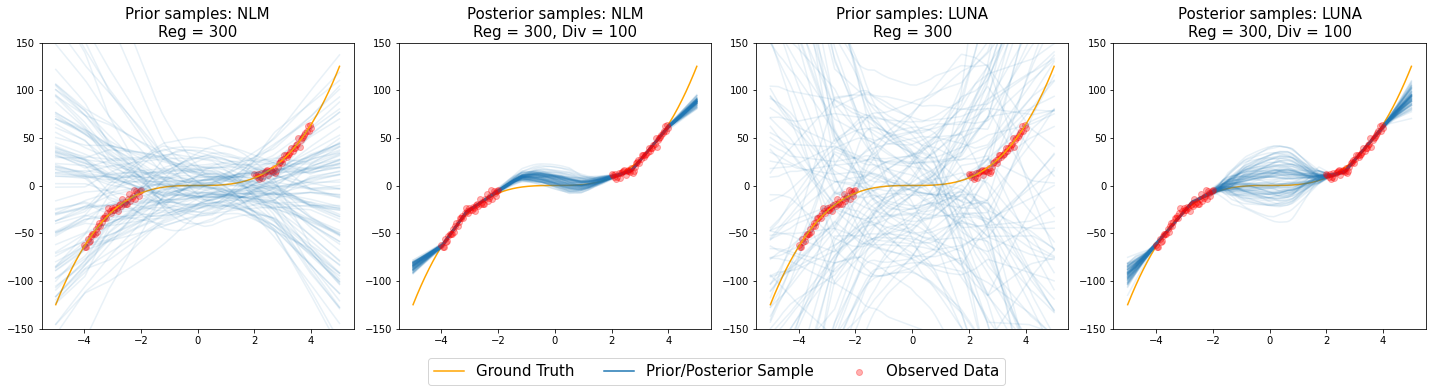

In [118]:
div = 100.
reg = 300.
div_idx = div_grid.index(div)
reg_idx = reg_grid.index(reg)
nlm = nlm_list[reg_idx]
luna_idx = div_idx * len(reg_grid) + reg_idx
luna = luna_list[luna_idx]
print('Reg =', luna.params['reg_param'],'Div =',luna.params['lambda_in'])

fig, axes = plt.subplots(1,4,figsize=(20,5))
y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var, n_models = 100)
axes[0].scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
axes[0].plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
axes[0].plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
axes[0].set_title(f"Prior samples: NLM\nReg = {int(reg)}",fontsize = 15)
axes[0].set_ylim([-150, 150])

y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 100)
axes[1].scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
axes[1].plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
axes[1].plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
axes[1].set_title(f"Posterior samples: NLM\nReg = {int(reg)}, Div = {int(div)}",fontsize = 15)
axes[1].set_ylim([-150, 150])

y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var, n_models = 100)
axes[2].scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
axes[2].plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
axes[2].plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
axes[2].set_title(f"Prior samples: LUNA\nReg = {int(reg)}",fontsize = 15)
axes[2].set_ylim([-150, 150])

y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 100)
axes[3].scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
axes[3].plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
axes[3].plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
axes[3].plot(np.NaN, np.NaN, color='tab:blue', label="Prior/Posterior Sample")
axes[3].set_title(f"Posterior samples: LUNA\nReg = {int(reg)}, Div = {int(div)}",fontsize = 15)
axes[3].set_ylim([-150, 150])
handles, labels = axes[3].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3,fontsize = 15,bbox_to_anchor=(0.25, -0.1, 0.5, 0.5))
plt.tight_layout()
# plt.savefig(imagePath+'LUNA_NLM_comparison.png',dpi = 150, bbox_inches='tight')
plt.show()